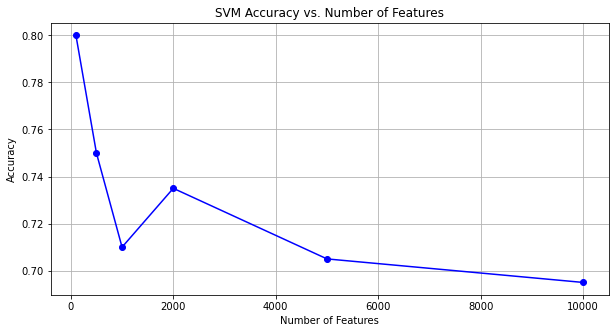

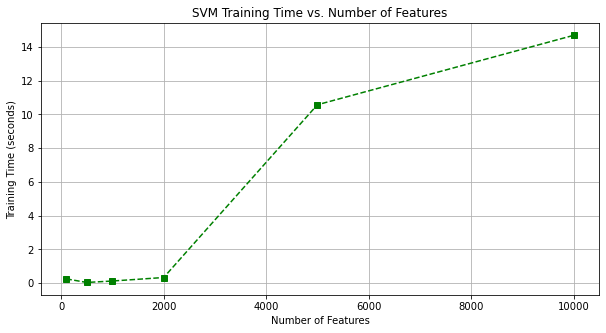

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import time

# Define ratios of (feature/instance) and a fixed base number of instances
ratios = [(0.1, 1000), (0.5, 1000), (1, 1000), (2, 1000), (5, 1000), (10, 1000)]

# Store results
feature_counts = []
accuracies = []
execution_times = []

for ratio, base_instances in ratios:
    try:
        num_features = int(ratio * base_instances)
        num_instances = base_instances

        # Generate classification data
        X, y = make_classification(n_samples=num_instances,
                                   n_features=num_features,
                                   n_informative=min(10, num_features),
                                   n_redundant=0,
                                   n_classes=2,
                                   random_state=42)

        # Train/test split
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Train SVM
        model = SVC(kernel='linear')
        start_time = time.time()
        model.fit(X_train, y_train)
        end_time = time.time()

        # Predict and evaluate
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)

        # Save results
        feature_counts.append(num_features)
        accuracies.append(acc)
        execution_times.append(end_time - start_time)

    except Exception as e:
        print(f"Skipped ratio {ratio} due to error: {e}")

# Plot Accuracy vs. Number of Features
plt.figure(figsize=(10,5))
plt.plot(feature_counts, accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel("Number of Features")
plt.ylabel("Accuracy")
plt.title("SVM Accuracy vs. Number of Features")
plt.grid(True)
plt.show()

# Plot Execution Time vs. Number of Features
plt.figure(figsize=(10,5))
plt.plot(feature_counts, execution_times, marker='s', linestyle='--', color='green')
plt.xlabel("Number of Features")
plt.ylabel("Training Time (seconds)")
plt.title("SVM Training Time vs. Number of Features")
plt.grid(True)
plt.show()